# <span style="color:blue">Introduction to Data Mining 101</span>

Data mining or machine learning is very useful when you're trying to predict or gain insight from data. There are many algorithms: linear regression, regression decision trees, SVM, logistic regression, deep learning models, etc. These algorithms are generally grouped into two categories:

### Supervised Models
Supervised models use **labeled data** to train and predict outcomes. Common algorithms include:
- Linear/Logistic Regression
- Decision Trees
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)

### Unsupervised Models
Unsupervised models do **not use labeled data**. Instead, they try to uncover patterns, similarities, or clusters within the data. Examples include:
- K-Means Clustering
- Hierarchical Clustering
- PCA (Dimensionality Reduction)

---

## Hands-On: Unsupervised Model
Let's explore an unsupervised learning example to showcase what you can do with machine learning.


In [84]:
from sklearn.datasets import make_blobs
import pandas as pd
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, n_features=3, random_state=78, cluster_std=3)

dummy_test=pd.DataFrame(X, columns=['temperature', 'Feature2', 'Feature3'])

#dummy_test['Target']=y #we could have used the response variable if we wanted to toy around with supervised models. That might be data mining 102 who knows. 
dummy_test.head(10)



,temperature,Feature2,Feature3
0,4.844697,-6.237337,-7.285891
1,6.309623,9.719444,3.490302
2,7.190027,10.436891,-0.747045
3,8.218694,3.629903,1.538102
4,-13.053499,1.158304,5.471713
5,11.627262,12.304815,-1.710409
6,4.931428,7.012831,-5.121899
7,9.673767,-3.930189,-10.094903
8,5.615043,-3.165291,-4.706215
9,7.208296,-2.622087,-11.050165


In [85]:
y.shape

(1000,)

In [86]:
#I have covered pandas quite a bit but the describe function is very useful especially when you want to get a quick glance on the numerical features
dummy_test.describe()

,temperature,Feature2,Feature3
count,1000.000000,1000.000000,1000.000000
mean,1.277212,2.602857,-1.285378
std,7.938019,6.751350,6.550327
min,-18.380424,-16.083573,-18.200801
25%,-6.875017,-3.203360,-6.710733
50%,4.440956,3.451349,-1.123990
75%,7.379662,7.956803,4.282820
max,15.899882,18.986475,17.040140


## Data Profiling with Pandas-Profiling
We can take this a step further and use the **pandas-profiling** library to perform automated data exploration. It's a helpful tool to get:
- A statistical summary
- Visualizations of data distributions
- Insight into data quality

Note: This step is optional but provides great context for EDA (Exploratory Data Analysis).


In [87]:
from pandas_profiling import ProfileReport

ProfileReport(dummy_test)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,3
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,23.6 KiB
Average record size in memory,24.1 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## Dealing with Null Values
It's also important to identify and handle missing values (`NaN`). Most machine learning algorithms cannot process missing values natively, so it's crucial to:
- Impute missing values
- Drop rows/columns
- Use domain knowledge to guide data cleaning

In [88]:
dummy_test.isnull().sum()

temperature    0
Feature2       0
Feature3       0
dtype: int64

In [89]:
X.shape

(1000, 3)

In [0]:
#lets import some libraries and make some predictions!
import pandas as pd
import plotly.express as px

from sklearn.cluster import KMeans

In [91]:
#let's initialize the model with 3 clusters since we made a makeshift dataset with 3 clusters
#you will generally have to tune the parameters to get it work with your data, which usually involves the number of clusters parameter (review sklearn KMEANS documentation)

model=KMeans(n_clusters=3, random_state=5)

model.fit(dummy_test)

#once model is fit we can now generate some predictions

predictions=model.predict(dummy_test)
print('length of predictions:', len(predictions), '\nfirst ten entries', predictions[:10])



length of predictions: 1000 
first ten entries [0 2 2 2 1 2 2 0 0 0]


In [92]:
#lets append these predictions to the pandas dataframe
'''as an aside we can use these classes to profile records or different types of patrons at a restaurant for example. Clustering algorithms can actually be used as input 
(eg the class column) for supervised models also. Those models would simply use the generated labels from our clustering algorithm as the labels. 

'''

dummy_test['class']=predictions

dummy_test.head(10)

,temperature,Feature2,Feature3,class
0,4.844697,-6.237337,-7.285891,0
1,6.309623,9.719444,3.490302,2
2,7.190027,10.436891,-0.747045,2
3,8.218694,3.629903,1.538102,2
4,-13.053499,1.158304,5.471713,1
5,11.627262,12.304815,-1.710409,2
6,4.931428,7.012831,-5.121899,2
7,9.673767,-3.930189,-10.094903,0
8,5.615043,-3.165291,-4.706215,0
9,7.208296,-2.622087,-11.050165,0


In [93]:
#groupby object to look at characteristics of the different classes

#use standardscalar to transform dataframe with standardized values for a quick analysis

from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
dummy_scaled = data_scaler.fit_transform(X)

dummy_scaled=pd.DataFrame(dummy_scaled, columns=['temperature', 'feature2', 'feature3'])
dummy_scaled['class']=predictions
dummy_scaled.groupby(by='class').mean()

,temperature,feature2,feature3
class,,,
0,0.644892,-1.182213,-1.113758
1,-1.302383,0.185453,1.078193
2,0.667116,0.979114,0.018942


## Interpreting Clusters
The profile belonging to **class one** is expected to be:
- Low on the temperature scale
- High on the `feature_3` dimension

A clustering chart like this can help validate assumptions or hypotheses you have about your data.

In [94]:
#oftentimes we visualize data with 2d scatterplots. Plotly's 3d scatterplot gives us another dimension to look at. This library is very powerful. I'd recommend you to check out its 
#documentation

fig=px.scatter_3d(dummy_test, x='temperature', y='Feature2', z='Feature3', color='class', width=800)

fig.show()

In [95]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


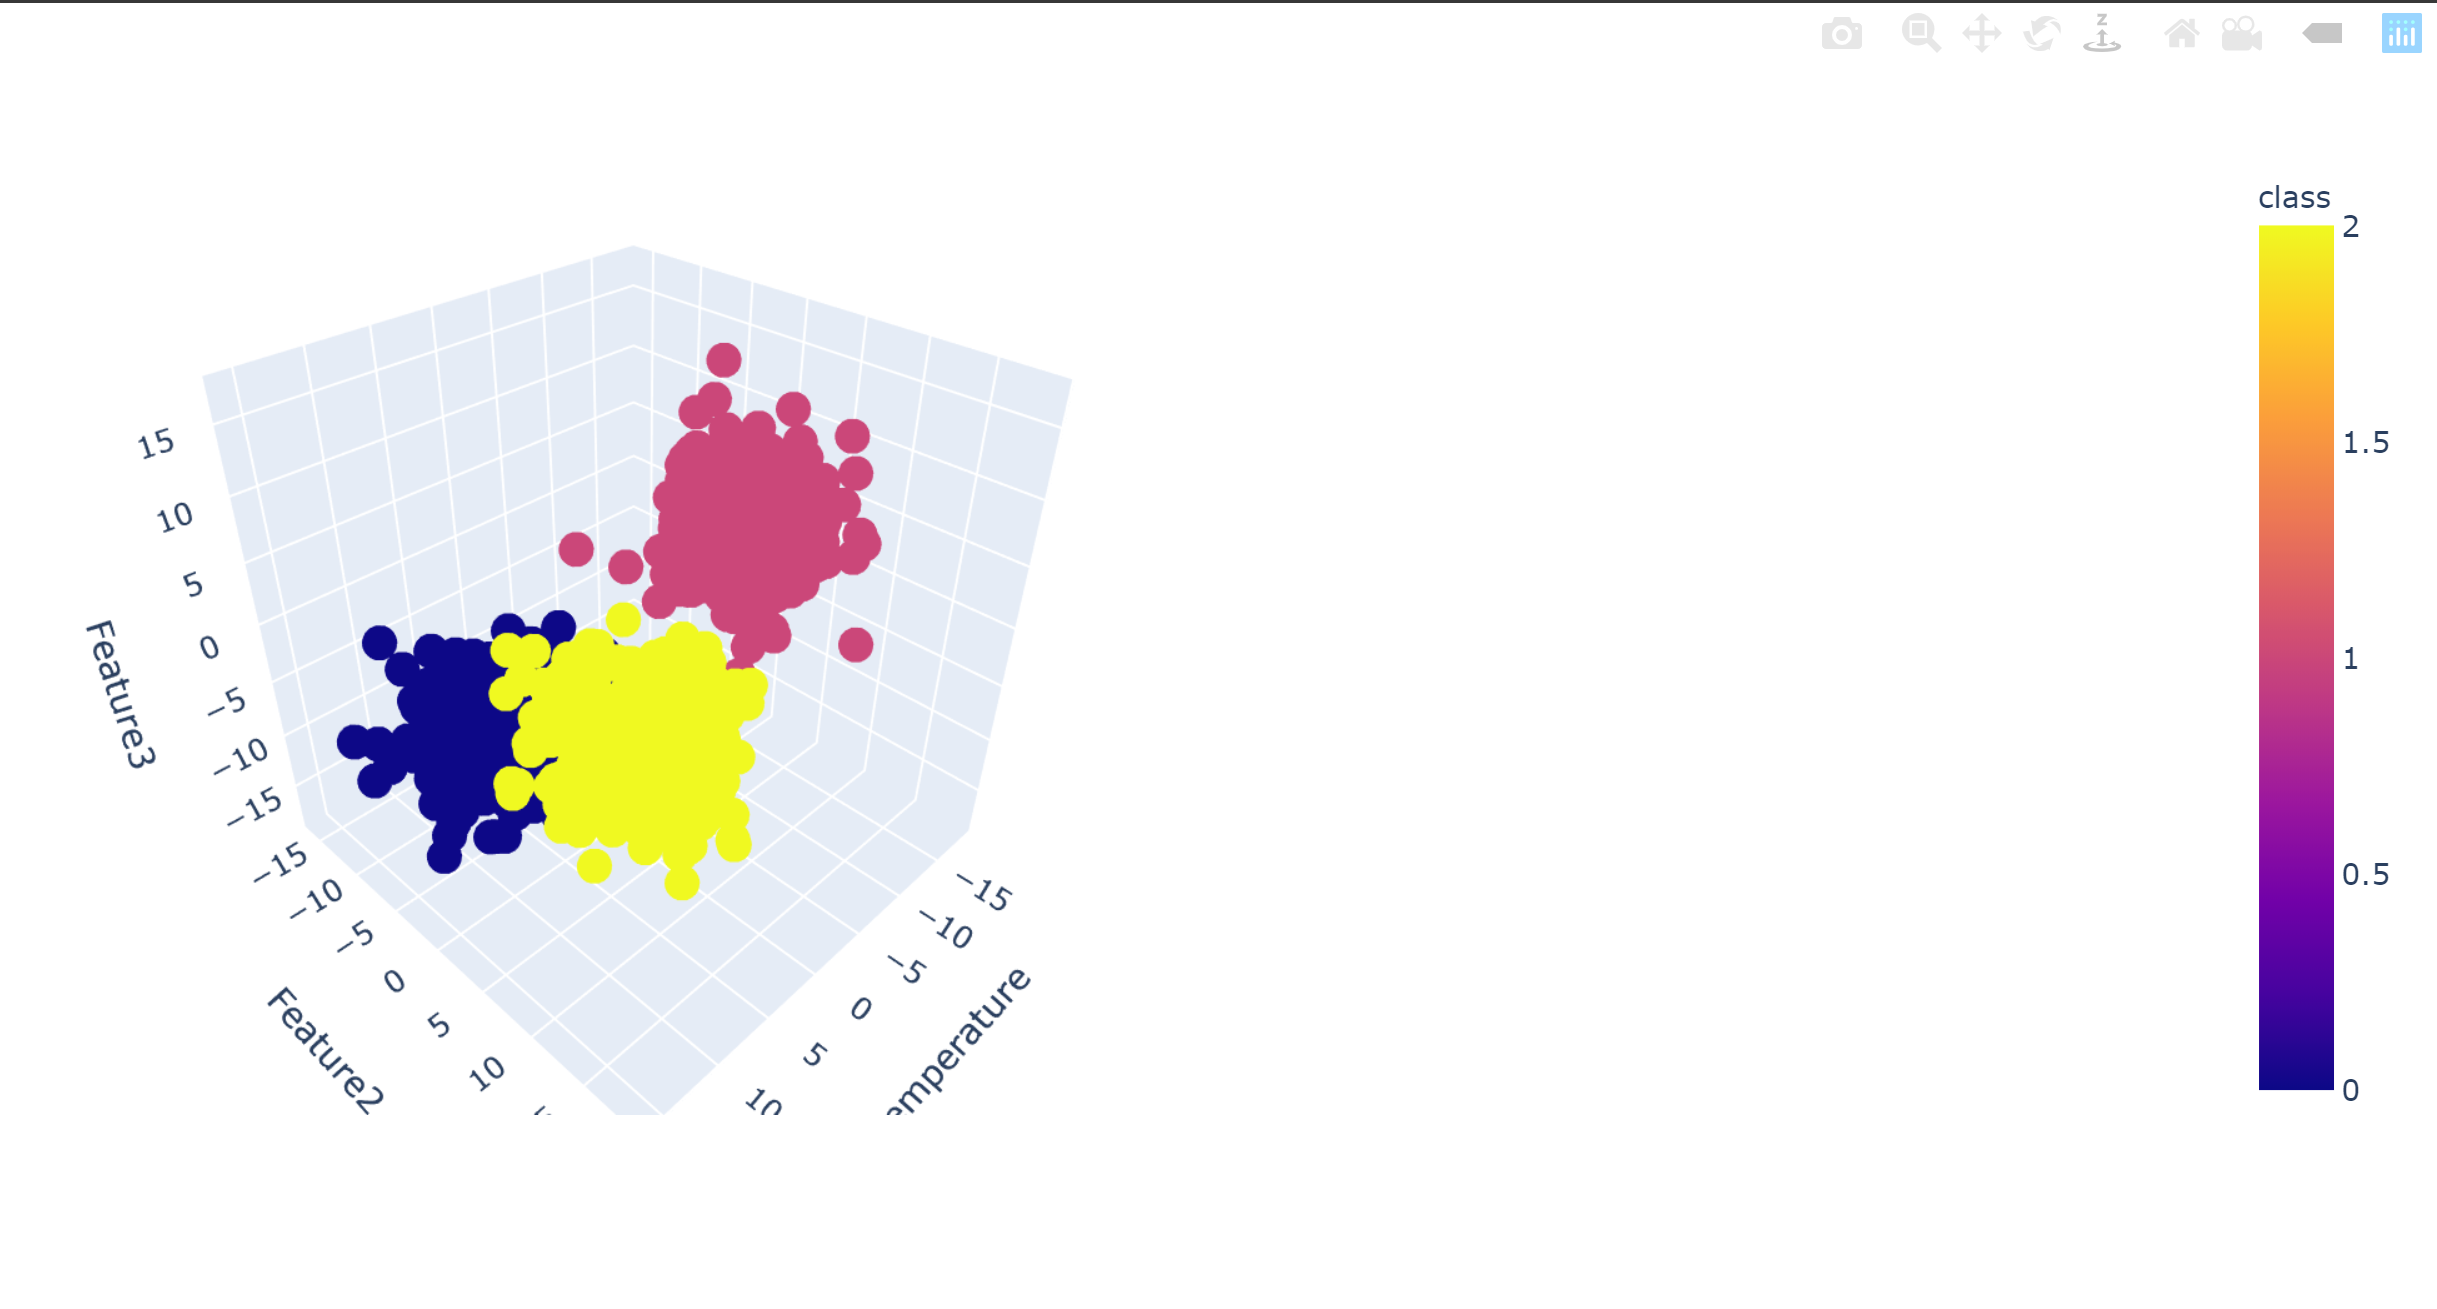

In [96]:
#Plotly should work in google colab and other python editors as coded in the previous cells but the output will look like the picture below
#github will not display plotly graphs

from IPython.display import Image
Image("/content/gdrive/My Drive/Colab Notebooks/Data Scientist Test/3d plot.png", width=800, height=500)

## Final Thoughts
If you made it through this notebook — even with some Googling or Stack Overflow searching — congrats! 🎉 You're ready to move on to more advanced machine learning techniques.

Let me know your thoughts on this module. I often use a similar format when teaching this topic to my students.
